In [1]:
# Author: Javier Montero 
# License: MIT

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import json

import warnings
warnings.filterwarnings('ignore') # hide timezone warnings


filename = 'data/data_featured.csv'

In [2]:
df = pd.read_csv (filename)
df['timestamp']=pd.to_datetime (df.timestamp, utc=True)
df.head(4)

timestamp device       account  motion  condition  \
0 2019-07-31 03:00:00+00:00  F46F6  dummy_user_1       0          2   
1 2019-07-31 03:00:00+00:00  F4641  dummy_user_3       0          2   
2 2019-07-31 03:00:00+00:00  F4643  dummy_user_3      17          2   
3 2019-07-31 03:00:00+00:00  F45C6  dummy_user_2       0          2   

   temperature  humidity  precipitation  pressure daynight  
0         13.3        93            0.0    1022.4    night  
1         13.3        93            0.0    1022.4    night  
2         13.3        93            0.0    1022.4    night  
3         13.3        93            0.0    1022.4    night

In [3]:
devices=['F46F6','F4764','F45C6','F46EE','F4641','F4643']
accounts = ['dummy_user_1','dummy_user_2','dummy_user_3']

In [4]:
start = df.timestamp.min().strftime('%Y-%m-%d')
end   = df.timestamp.max().strftime('%Y-%m-%d')

In [5]:
print (start,end)

2019-07-31 2019-10-09


In [6]:
# Temperature
sensor_df=df[df.device=='F4641']

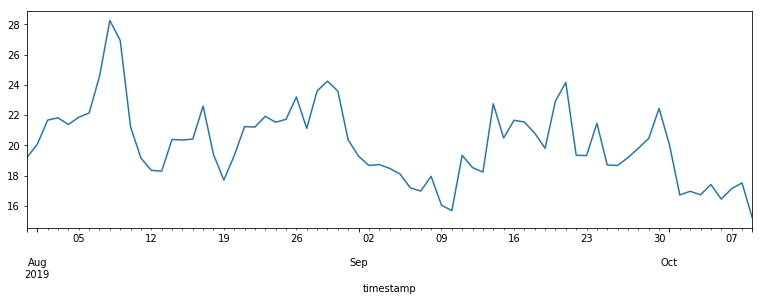

In [7]:
plt.figure(figsize=(13,4))
#sensor_df.temperature.plot()
sensor_df.set_index('timestamp').resample('D').mean()['temperature'].plot()

2063


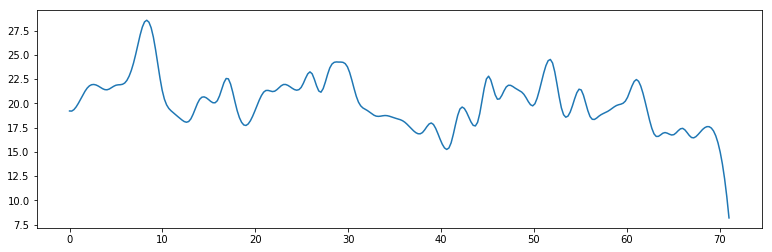

In [8]:
# Plot temperature using splines
d=sensor_df.set_index('timestamp').resample('D').mean()
d.shape[0]

from scipy.interpolate import make_interp_spline, BSpline

# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(0, 71, 300) 
T = np.linspace(0, 70,71)
print (sensor_df.temperature.shape[0])
spl = make_interp_spline(T, d.temperature, k=3)  # type: BSpline
power_smooth = spl(xnew)

plt.figure(figsize=(13,4))
plt.plot(xnew, power_smooth)
plt.show()

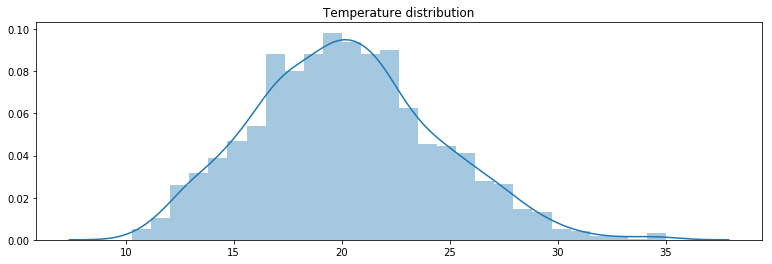

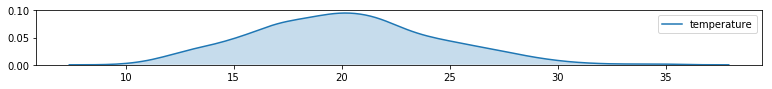

In [9]:
plt.figure(figsize=(13,4))
sns.distplot (sensor_df[['temperature']])
plt.title ("Temperature distribution")
plt.show()
plt.figure(figsize=(13,1))
sns.kdeplot(sensor_df.temperature, shade=True)
plt.show()

## Weather features distribution analysis

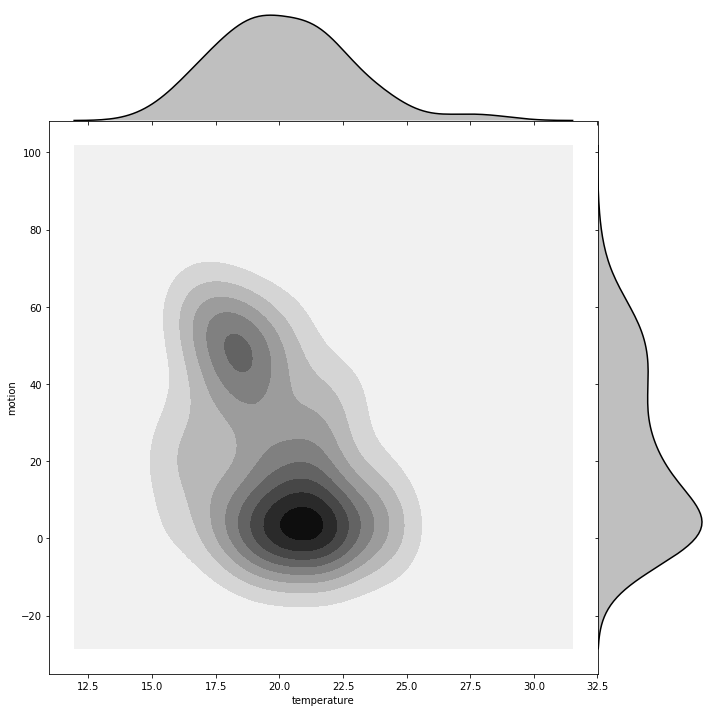

In [10]:
# Acivity vs Temperature
d=sensor_df.set_index('timestamp').resample('D').mean()

sns.jointplot(x=d.temperature, y=d.motion, kind="kde",color='k',height=10,space=0)

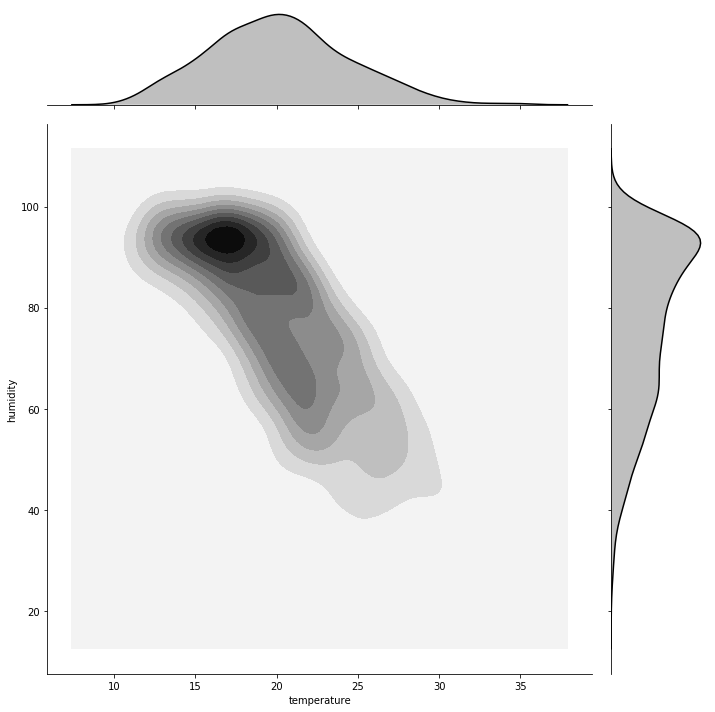

In [11]:
# Temperature vs Humidity
sns.jointplot(x=sensor_df.temperature, y=sensor_df.humidity, kind="kde",color='k',height=10)


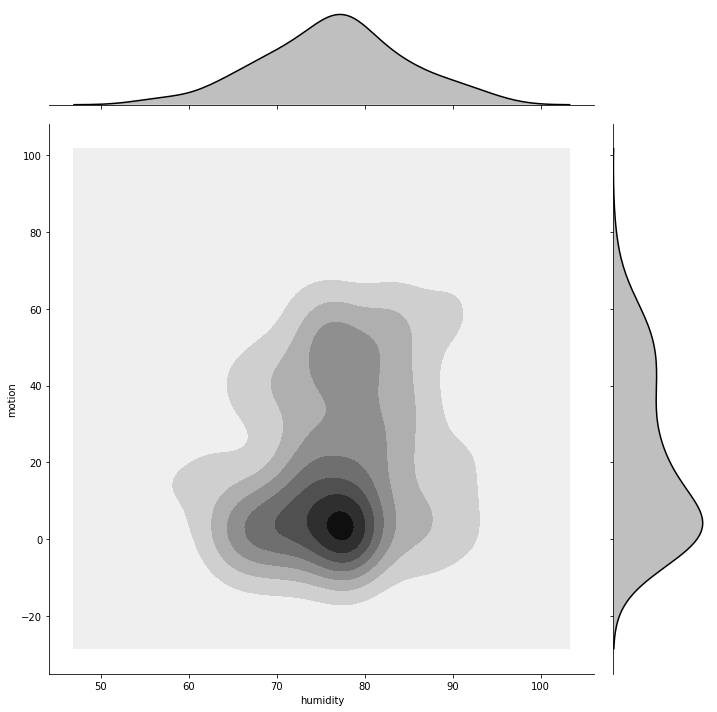

In [12]:
# Activity vs Humidity
d=sensor_df.set_index('timestamp').resample('D').mean()

sns.jointplot(x=d.humidity, y=d.motion, kind="kde",color='k',height=10)

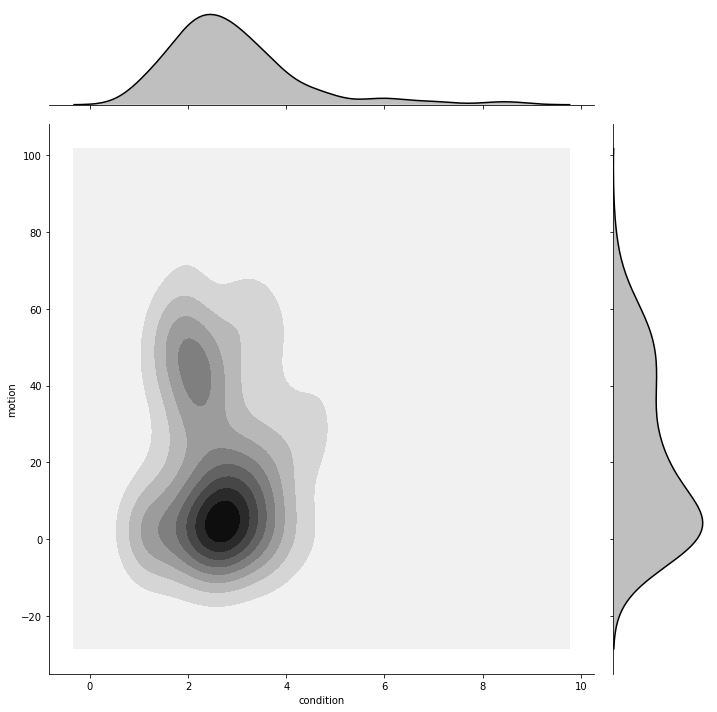

In [13]:
# Activity vs Condition
d=sensor_df.set_index('timestamp').resample('D').mean()

sns.jointplot(x=d.condition, y=d.motion, kind="kde",color='k',height=10)

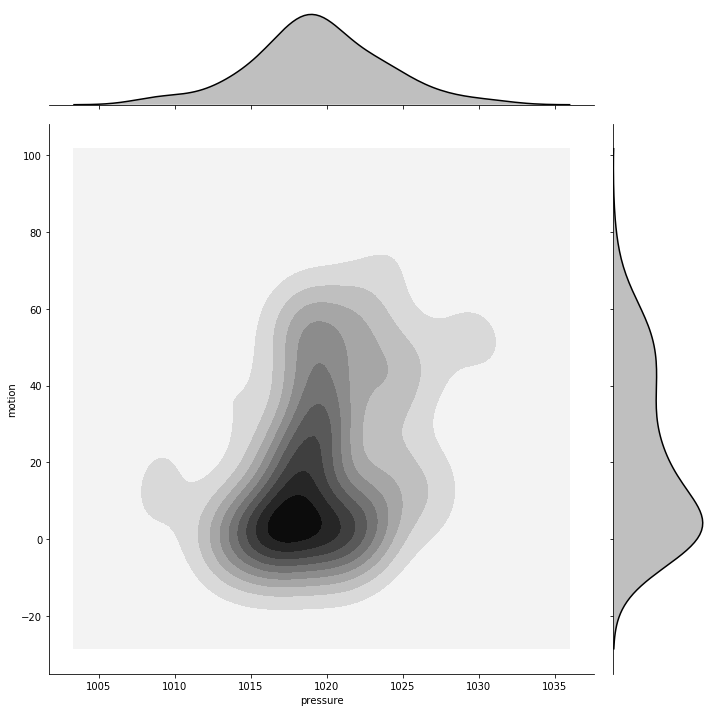

In [14]:
# Activity vs Pressure
d=sensor_df.set_index('timestamp').resample('D').mean()

sns.jointplot(x=d.pressure, y=d.motion, kind="kde",color='k',height=10)

## Weather pairplots

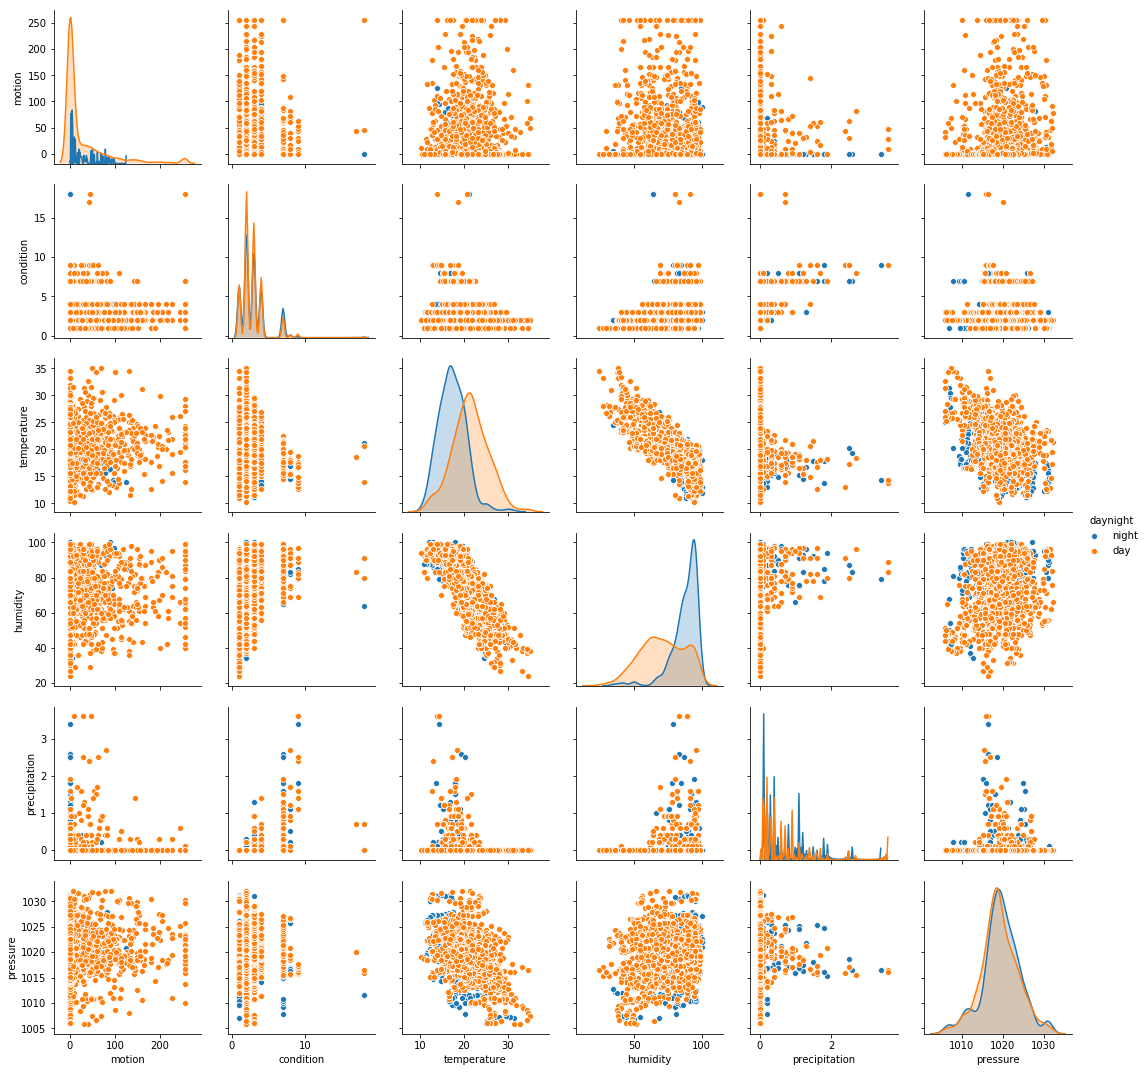

In [15]:
# Pairplot without resampling to see day/night classification
d=sensor_df.set_index('timestamp')
sns.pairplot(d,kind='scatter', hue='daynight', diag_kind="kde")

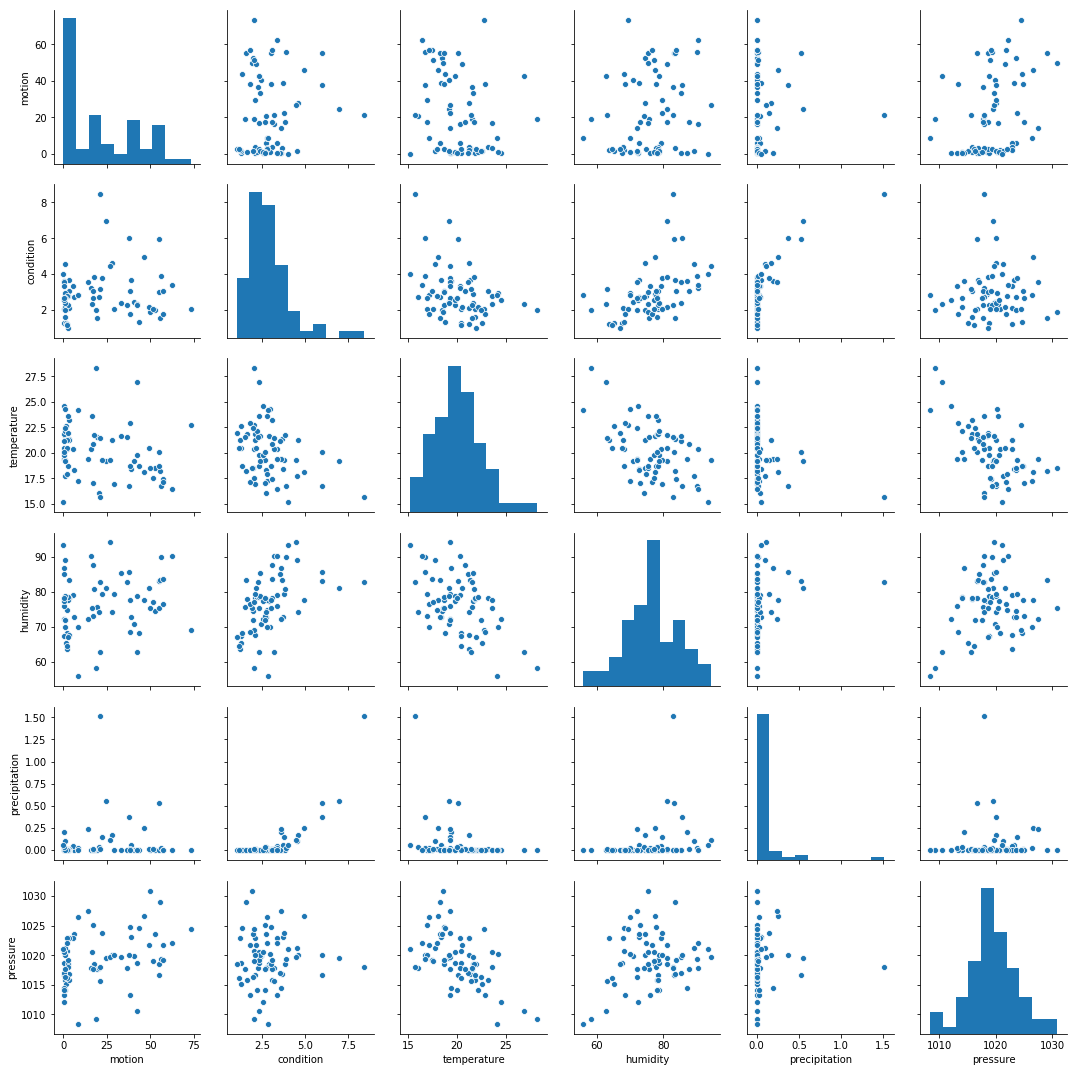

In [16]:
d=sensor_df.set_index('timestamp').resample('D').mean()
sns.pairplot(d)

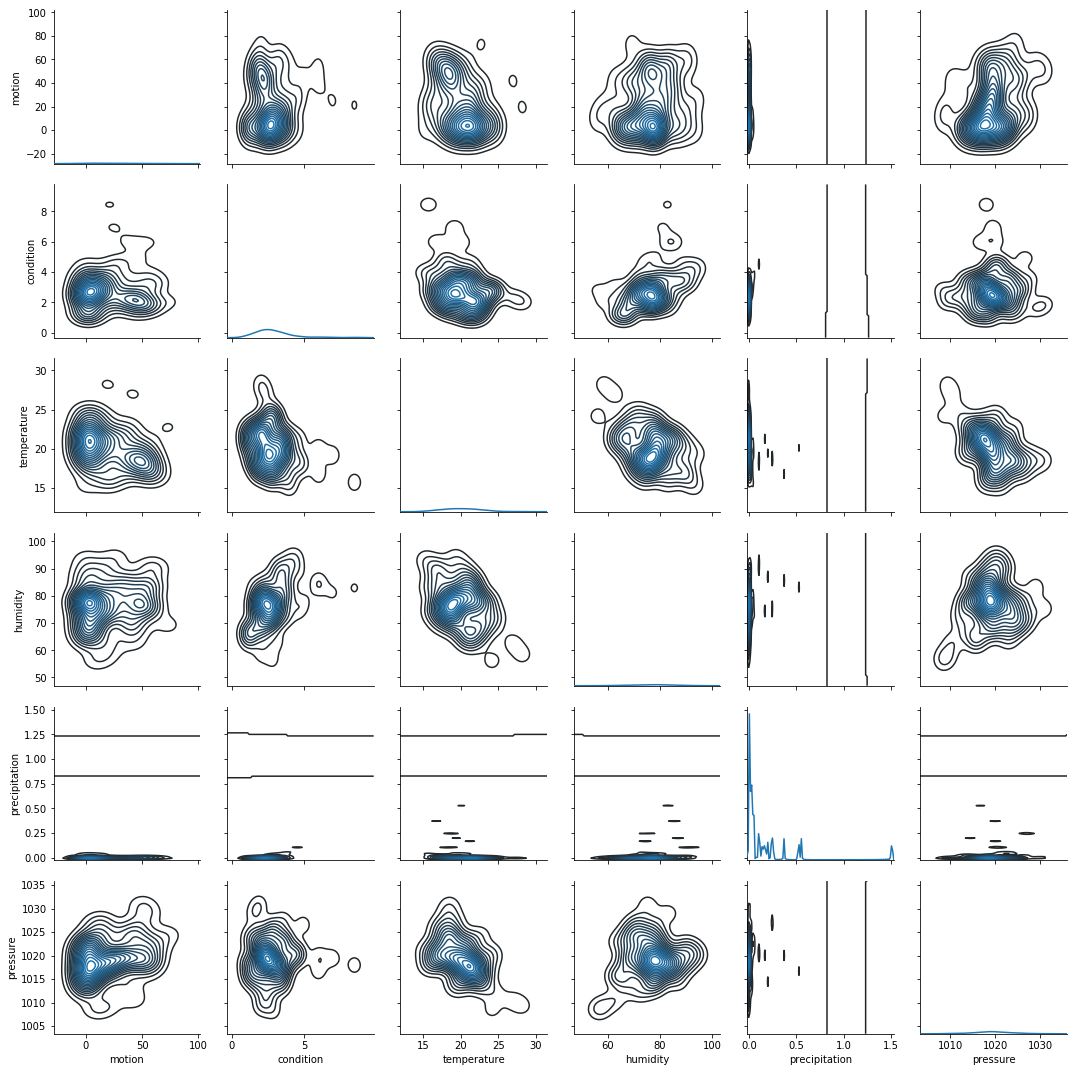

In [17]:
d=sensor_df.set_index('timestamp').resample('D').mean()
g = sns.PairGrid(d)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=20);

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
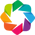

:GridMatrix   [X,Y]
   :NdOverlay   [species]
      :Scatter   [sepal_width]   (sepal_width)

In [18]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

from bokeh.sampledata.iris import flowers
from holoviews.operation import gridmatrix

ds = hv.Dataset(flowers)

grouped_by_species = ds.groupby('species', container_type=hv.NdOverlay)
grid = gridmatrix(grouped_by_species, diagonal_type=hv.Scatter)

grid.opts(opts.Scatter(tools=['hover', 'box_select'], bgcolor='#efe8e2', fill_alpha=0.2, size=4))

In [19]:
d=sensor_df.set_index('timestamp').resample('D').mean()
d=hv.Dataset (d)
grouped = d#.groupby('daynight', container_type=hv.NdOverlay)

grid = gridmatrix(grouped, diagonal_type=hv.Scatter)

grid.opts(opts.Scatter(tools=['hover', 'box_select'], bgcolor='#efe8e2', fill_alpha=0.2, size=4, alpha=0.8))

:GridMatrix   [X,Y]
   :Scatter   [temperature]   (temperature)

## Daylight analysis


In [20]:
import ephem
from datetime import timedelta
import datetime

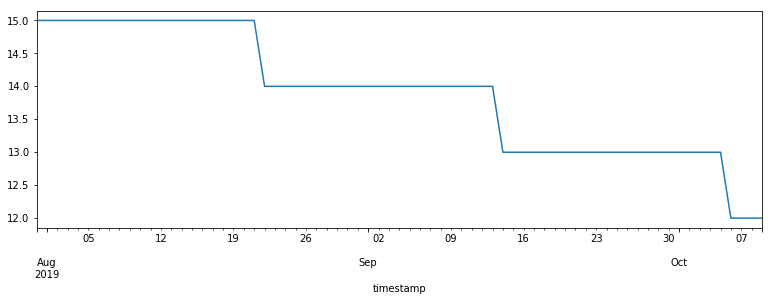

In [21]:
daily=df.set_index('timestamp').resample('D').mean()


def light_hours (d, dt):
    o=ephem.Observer()  
    o.lat='40.416775'  # Madrid
    o.long='-3.703790' # Madrid
    o.horizon = '-6'  # Kind of twilight (-12 = nautical)
    #o.date= ("2013-09-04 12:00:00")
    o.date = dt
    
    s=ephem.Sun()  

    rising_t  = o.previous_rising(s, use_center=True)
    setting_t = o.next_setting   (s, use_center=True) 
    
    delta = setting_t.datetime()-rising_t.datetime()

    return round (delta.seconds /3600) 
    
lighthours=[]
for i in range(0,daily.shape[0]):
    dt=daily.iloc[i].name.strftime("%Y-%m-%d")+ ' 12:00:00'
    lighthours.append (light_hours(daily,dt))
    
daily['light'] = lighthours
daily.light.plot(figsize=(13,4))
